In [2]:
from lcmap.client import Client
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.cm as cm
import matplotlib.dates as mdates
import skimage.exposure as ex
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
client = Client();

In [38]:
x, y = -2096625, 3095025
t1, t2 = '2001-06-01', '2003-06-01'
_, rt_L5 = client.data.surface_reflectance.tiles("LANDSAT_5/TM/sr_band3", x, y, t1, t2)
_, cf_L5 = client.data.surface_reflectance.tiles("LANDSAT_5/TM/cfmask", x, y, t1, t2)
_, rt_L7 = client.data.surface_reflectance.tiles("LANDSAT_7/ETM/sr_band3", x, y, t1, t2)
_, cf_L7 = client.data.surface_reflectance.tiles("LANDSAT_7/ETM/cfmask", x, y, t1, t2)

In [63]:
import datetime
import numpy

def parse(s):
    return datetime.datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ")

In [69]:
point = 1,1 # raster grid coordinate (not projection system)
r5 = numpy.array([(parse(t.acquired),t.data[point]) for t in rt_L5])
r7 = numpy.array([(parse(t.acquired),t.data[point]) for t in rt_L7])

(730643.2083333334, 731363.2083333334)

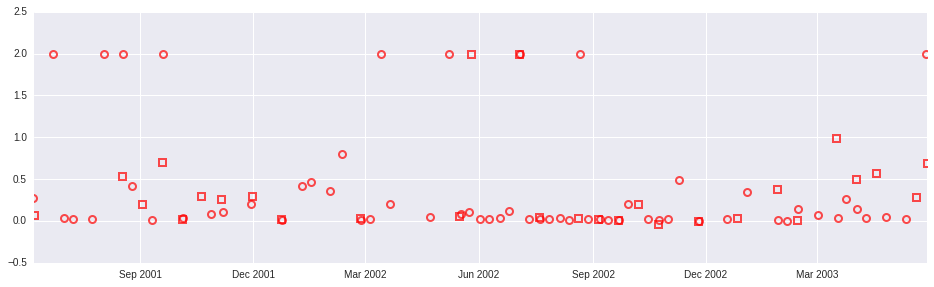

In [117]:
fig = plt.figure(figsize=(16, 4.5))
fig.hold(True)
ax = fig.add_subplot(111)
ax.set_ylim(-0.5, 2.5)
ax.plot_date(r5[:,0], r5[:,1], 'rs', ms=7, alpha=0.7, mew=2.0, markeredgecolor='red', markerfacecolor='none')
ax.plot_date(r7[:,0], r7[:,1], 'ro', ms=7, alpha=0.7, mew=2.0, markeredgecolor='red', markerfacecolor='none')
ax.set_xlim(r5[0,0], r5[-1,0])

In [116]:
import numpy as np

def compare(*tiles):
    return [{'std':np.std(t),'mean':np.mean(t),'median':np.median(t)} for t in tiles]
    
compare(rt_L5[0].data, rt_L7[0].data)

[{'mean': masked_array(data = 0.5306542605813619,
               mask = False,
         fill_value = 1e+20),
  'median': masked_array(data = 0.32959999167360365,
               mask = False,
         fill_value = 1e+20),
  'std': 0.63116180190979276},
 {'mean': masked_array(data = 1.7581299986156846,
               mask = False,
         fill_value = 1e+20), 'median': masked_array(data = 1.9999999494757503,
               mask = False,
         fill_value = 1e+20), 'std': 0.59305308520520206}]